### Imports:

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [3]:
day_data = pd.read_csv("dataverse_files\day_approach_maskedID_timeseries.csv",
dtype={'nr.sessions': 'category',
'nr.sessions.1': 'category',
'nr.sessions.2': 'category',
'nr.sessions.3': 'category',
'nr.sessions.4': 'category',
'nr.sessions.5': 'category',
'nr.sessions.6': 'category'
,'injury': 'category'})
day_data.head()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
0,1.0,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,...,0.0,0.0,0.0,1.0,0.10,0.00,0.15,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0,0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0,0,3
4,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,...,0.0,0.0,0.0,0.0,0.11,0.00,0.17,0,0,4


In [4]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42766 entries, 0 to 42765
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   nr. sessions                 42766 non-null  float64 
 1   total km                     42766 non-null  float64 
 2   km Z3-4                      42766 non-null  float64 
 3   km Z5-T1-T2                  42766 non-null  float64 
 4   km sprinting                 42766 non-null  float64 
 5   strength training            42766 non-null  float64 
 6   hours alternative            42766 non-null  float64 
 7   perceived exertion           42766 non-null  float64 
 8   perceived trainingSuccess    42766 non-null  float64 
 9   perceived recovery           42766 non-null  float64 
 10  nr. sessions.1               42766 non-null  float64 
 11  total km.1                   42766 non-null  float64 
 12  km Z3-4.1                    42766 non-null  float64 
 13  k

In [5]:
pvalues = {}

for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "nr. sessions" + suffix
    combination_counts = day_data.value_counts(subset=["injury", col]).unstack(level=0).fillna(0)
    chi2, p, _, _ = stats.chi2_contingency(combination_counts)
    pvalues[col] = p

In [6]:
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "total km" + suffix
    samples_by_group = []
    for value in set(day_data["injury"]):
        mask = day_data["injury"] == value
        samples_by_group.append(day_data[col][mask])
    stat, p = stats.kruskal(*samples_by_group)
    pvalues[col] = p


In [7]:
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "km Z3-4" + suffix
    samples_by_group = []
    for value in set(day_data["injury"]):
        mask = day_data["injury"] == value
        samples_by_group.append(day_data[col][mask])
    stat, p = stats.kruskal(*samples_by_group)
    pvalues[col] = p

In [8]:
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "km Z5-T1-T2" + suffix
    samples_by_group = []
    for value in set(day_data["injury"]):
        mask = day_data["injury"] == value
        samples_by_group.append(day_data[col][mask])
    stat, p = stats.kruskal(*samples_by_group)
    pvalues[col] = p


In [9]:
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "km sprinting" + suffix
    samples_by_group = []
    for value in set(day_data["injury"]):
        mask = day_data["injury"] == value
        samples_by_group.append(day_data[col][mask])
    stat, p = stats.kruskal(*samples_by_group)
    pvalues[col] = p

In [10]:
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "strength training" + suffix
    combination_counts = day_data.value_counts(subset=["injury", col]).unstack(level=0).fillna(0)
    chi2, p, _, _ = stats.chi2_contingency(combination_counts)
    pvalues[col] = p

In [11]:
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "hours alternative" + suffix
    samples_by_group = []
    for value in set(day_data["injury"]):
        mask = day_data["injury"] == value
        samples_by_group.append(day_data[col][mask])
    stat, p = stats.kruskal(*samples_by_group)
    pvalues[col] = p

In [14]:
# Only uses days where training occured
temp_df = day_data[day_data["perceived exertion"] != -1]

for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "perceived exertion" + suffix
    samples_by_group = []
    for value in set(day_data["injury"]):
        mask = day_data["injury"] == value
        samples_by_group.append(day_data[col][mask])
    stat, p = stats.kruskal(*samples_by_group)
    pvalues[col] = p

In [16]:
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "perceived trainingSuccess" + suffix
    samples_by_group = []
    for value in set(day_data["injury"]):
        mask = day_data["injury"] == value
        samples_by_group.append(day_data[col][mask])
    stat, p = stats.kruskal(*samples_by_group)
    pvalues[col] = p

In [26]:
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "perceived recovery" + suffix
    samples_by_group = []
    for value in set(day_data["injury"]):
        mask = day_data["injury"] == value
        samples_by_group.append(day_data[col][mask])
    stat, p = stats.kruskal(*samples_by_group)
    pvalues[col] = p

In [54]:
pvalues = dict(sorted(pvalues.items(), key=lambda item: item[1], reverse=True))

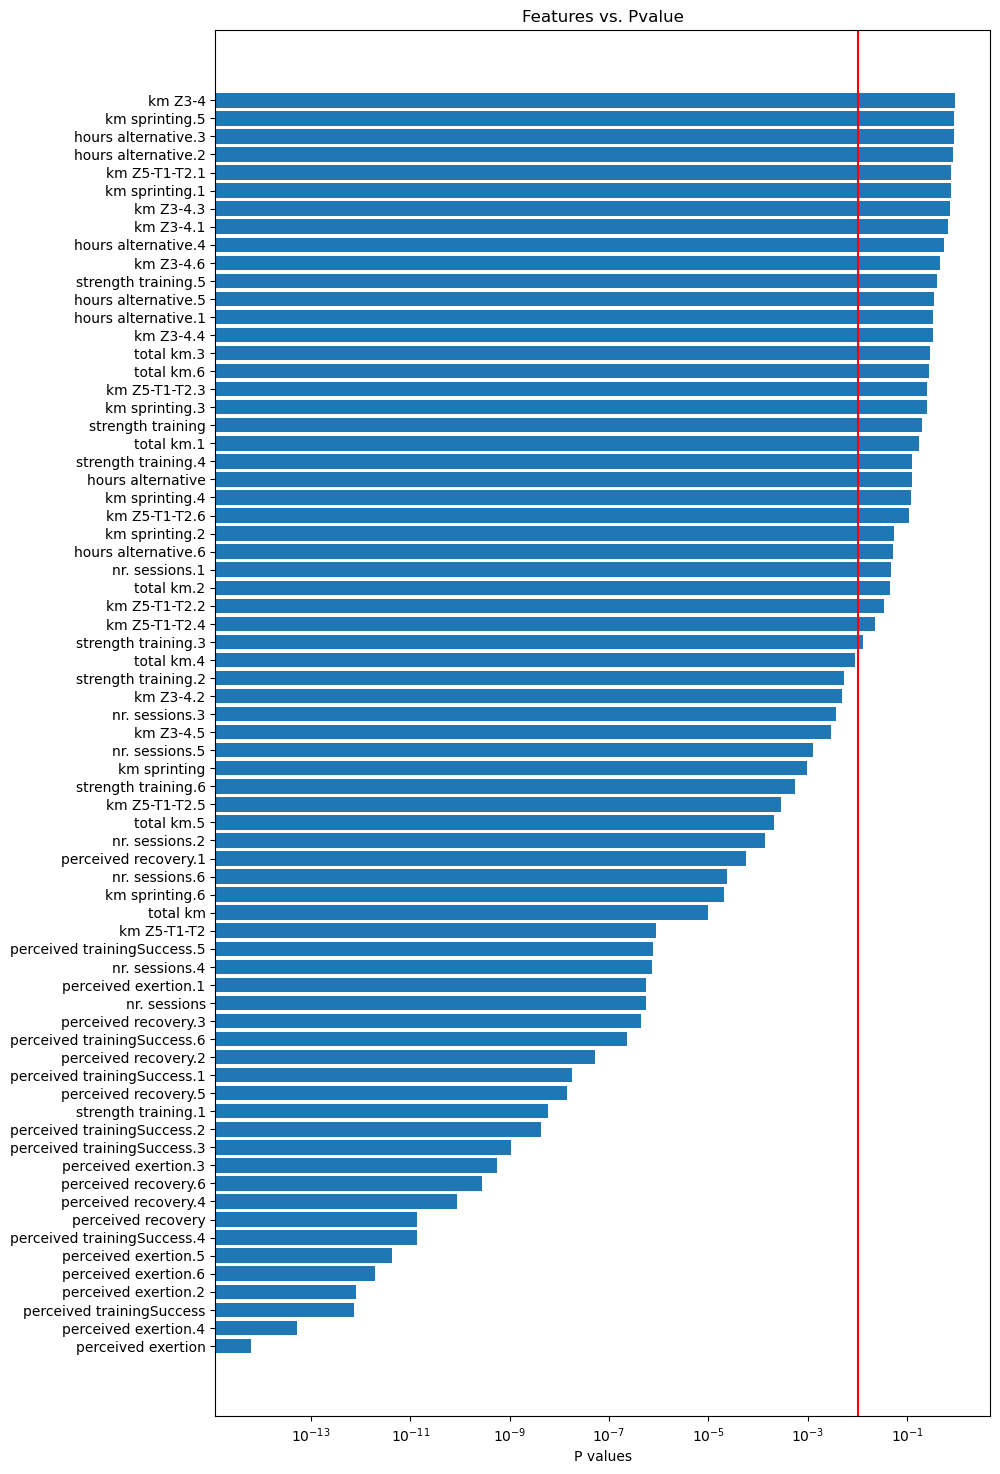

In [60]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
features = pvalues.keys()
y_pos = np.arange(len(features))

ax.barh(y_pos, pvalues.values(), align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(features)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('P values')
ax.set_title('Features vs. Pvalue')
ax.set_xscale('log')
fig.set_size_inches(10, 18)

plt.axvline(x=0.01, c='r')

#plt.barh(pvalues.keys(), pvalues.values())